<a href="https://colab.research.google.com/github/ucfilho/optim_raianars/blob/master/ANN_parte_002_ajuste_ann_SET_11_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/ucfilho/optim_raianars/ #clonar do Github
%cd optim_raianars
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'optim_raianars' already exists and is not an empty directory.
/content/optim_raianars
Hello world
I'm evolving!!!



In [0]:
X_NOME=['DI RELATIVO','FRAC Its','VELOC FOBJ',
        'VELOC X','DELTA FOBJ','DELTA VX']
Y_NOME=['NP','F','CR']

In [0]:
ARQ_X='X_DAT_set_11_2019.csv'
X=pd.read_csv(ARQ_X)
X=X[X_NOME]
#print(X.head())

In [0]:
ARQ_Y='Y_DAT_set_11_2019.csv'

Y=pd.read_csv(ARQ_Y)
#Y=Y[Y_NOME[2]] ???
Y=Y[Y_NOME]
#print(Y.head())

In [0]:
XX=X.loc[X['VELOC X']==X['VELOC X'],X_NOME].values
y=Y.loc[Y['NP']==Y['NP'],['CR']].values

In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x,w):
    strings=list(x)
    for featur in strings:
        max_feat=w[featur].max()
        min_feat=w[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [0]:
#XXX = X.sample(frac =.7,random_state = 2)  
#YY = Y.sample(frac =.7,random_state = 2)  
#print(XXX.head())
#print(YY.head())
#X_test = X.loc[~X.index.isin(XXX.index), :]
#print(X_test)

In [0]:
X_train= X.sample(frac =.7,random_state = 2)  
Y_train= Y.sample(frac =.7,random_state = 2)
X_test = X.loc[~X.index.isin(X_train.index), :]
Y_test = Y.loc[~Y.index.isin(Y_train.index), :]  
#print(XXX.head())
#print(YY.head())
y_old=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values
#y_total=Y.loc[Y['NP']==Y['NP'],['CR']].values
y_total=Y['CR']
y_total=pd.DataFrame(y_total)
y_total.columns = ["y_old"]
#print(y_total)

In [0]:
#print(len(y_old))
#print(Y_test['CR'])

In [0]:
# input dataset
#Neuron_input=3
Neuron_input=len(X_NOME)
Neuron_hidden=5
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=500000

In [0]:

#y_old=DAT['TC1']
#DAT=normatize(DAT)
Y_train=normatize(Y_train,Y)
X_train=normatize(X_train,X)
#print(X.head())

Epoch 0 error:0.33175727937171784
Epoch 2000 error:0.1880338838284976
Epoch 4000 error:0.1765712794337788
Epoch 6000 error:0.17047640082252746
Epoch 8000 error:0.16375812746289886
Epoch 10000 error:0.1553149159629279
Epoch 12000 error:0.1432128653836003
Epoch 14000 error:0.13194561723894505
Epoch 16000 error:0.12244268927761753
Epoch 18000 error:0.11436456246761775
Epoch 20000 error:0.10749911042348562
Epoch 22000 error:0.10169939735866694
Epoch 24000 error:0.09751298840417993
Epoch 26000 error:0.09299188839695867
Epoch 28000 error:0.08853877860571502
Epoch 30000 error:0.08427939708881199
Epoch 32000 error:0.08024508054146369
Epoch 34000 error:0.07642882881456345
Epoch 36000 error:0.0738280082094126
Epoch 38000 error:0.0717290626130364
Epoch 40000 error:0.06968177311192725
Epoch 42000 error:0.06777801700212284
Epoch 44000 error:0.06591895308568889
Epoch 46000 error:0.06415094897251897
Epoch 48000 error:0.062450004778245284
Epoch 50000 error:0.06076559952164609
Epoch 52000 error:0.05911

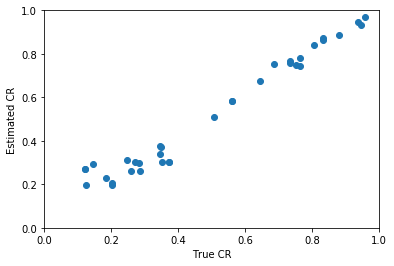

In [12]:


#X=DAT.loc[DAT['Speed']==DAT['Speed'],['Speed','Feed','Hard']].values
#y=DAT.loc[DAT['Speed']==DAT['Speed'],['TC1']].values
X_train=X_train.loc[X_train['VELOC X']==X_train['VELOC X'],X_NOME].values
y=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values
#X=XX
#np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1


for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 2000) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate

#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_old
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
#y_old=pd.DataFrame({'y_old':y_old})
y_old=pd.DataFrame(y_old)
y_old.columns = ["y_old"]
y_calc=original(y_calc,y_total)


plt.scatter(y_obs,y_calc)
plt.xlabel("True CR")
plt.ylabel("Estimated CR")
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()
#'''

In [0]:
#print(y_old)
X_test=X_test.loc[X_test['VELOC X']==X_test['VELOC X'],X_NOME].values
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})

#print(y_calc)
#print(y_old)
#print(l2)
#print(np.reshape(l2,len(l2)))

In [0]:
#print(l0)

In [0]:

#print(X_test)
l0 = X_test
l1 = sigmoid(np.dot(l0,syn0))
l2 = purelin(np.dot(l1,syn1))

In [0]:
y_old=pd.DataFrame(y_old)
y_old.columns = ["y_old"]
#print(y_old)

In [0]:
y_calc_test=np.reshape(l2,len(l2))
y_calc_test=pd.DataFrame({'y_calc_test':y_calc_test})
#y_old=pd.DataFrame(y_old)
#y_old.columns = ["y_old"]

In [18]:
print(y_calc_test)

    y_calc_test
0      1.765674
1     -0.775916
2     -0.756216
3      2.221216
4      1.326079
5     -2.509762
6      3.323889
7      3.976330
8      2.421516
9      1.391272
10     0.979994
11     3.080295
12     2.589089
13     0.411470
14    -0.391806


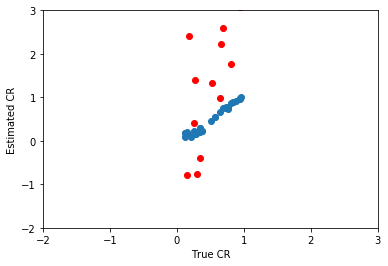

In [19]:
plt.scatter(y_obs,y_calc)
plt.scatter(Y_test['CR'],y_calc_test,color='r')
plt.xlabel("True CR")
plt.ylabel("Estimated CR")
plt.xlim((-2,3))
plt.ylim((-2,3))
plt.show()

In [0]:
#print(l1)

In [0]:
#print(l2)